<h1>Tire Marks</h1>
<h3>Lab Assignment Six: Convolutional Network Architectures</h3>

Emily Liss

<H2>Business Understanding</H2>

The dataset includes 1,854 digital images of tires, categorized as either "defective" or "good" condition. Each image represents an individual tire, with its classification based on the tire's physical state. This dataset was made to assist in machine learning and computer vision, specifically for tasks like image classification and object detection. It should be a helpful resource for researchers and professionals in transportation, automotive manufacturing, and quality control, enabling them to train and evaluate models designed to accurately identify tire conditions from digital images. This dataset has the potential to improve quality control procedures within the tire industry and reduce the risk of accidents caused by faulty tires. The dataset's availability paves the way for the development of highly accurate tire inspection systems, furthering the goal of safer tire production and improved road safety. 

This program would need to work fairly well to be utilized, as a false positive (deciding a tire is good when it's not) could be dangerous for drivers

Dataset Source: https://www.kaggle.com/datasets/warcoder/tyre-quality-classification/

<H2>Load and Prepare Data</H2>

In [148]:
import cv2
import os
import numpy as np
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_folder = "./Digital images of defective and good condition tyres"
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))

        # 'good' is the positive class (1) and 'defective' is the negative class (0)
        label = 1 if 'good' in filename.lower() else 0
        labels.append(label)
        images.append(img)

    return np.array(images), np.array(labels)

# Load images and labels
good_images, good_labels = load_images(os.path.join(data_folder, 'good'))
defective_images, defective_labels = load_images(os.path.join(data_folder, 'defective'))

# Combine the data
all_images = np.concatenate([good_images, defective_images])
all_labels = np.concatenate([good_labels, defective_labels])

# Shuffle the data
shuffle_indices = np.random.permutation(len(all_images))
all_images = all_images[shuffle_indices]
all_labels = all_labels[shuffle_indices]

<h1>CNN</h1>
<h3>Augmentation techniques</h3>

Rotation Range: Tires might be oriented differently in real-world scenarios, and allowing the model to see variations in rotation helps it become robust to different angles.

Shift Ranges: This is useful because tires might not always be perfectly centered in the images. Allowing horizontal and vertical shifts helps the model handle variations in positioning.

Shear Range: Tires may appear distorted due to various reasons, and shear transformation helps the model learn to recognize tires even when they are slightly deformed.

Zoom Range: Tires might appear at different scales in the images, and zooming helps the model become scale-invariant to some extent.

Horizontal and Vertical Flip: This accounts for the fact that tires can be oriented in different directions, and the model should be able to recognize them regardless of orientation.

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model 1: CNN with smaller filter size
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 2: CNN with larger filter size
model_2 = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 3: CNN with additional convolutional layer
model_3 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: CNN with increased complexity (more filters and dense units)
model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
models = [model_1, model_2, model_3, model_4]

<h2>Transfered Learning Models</h2>

In [233]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

modelT_1 = Sequential([
    base_model,
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 2: CNN with larger filter size
modelT_2 = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 3: CNN with additional convolutional layer
modelT_3 = Sequential([
    base_model,
    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: CNN with increased complexity (more filters and dense units)
modelT_4 = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
modelsT = [modelT_1, modelT_2, modelT_3, modelT_4]

<h2>Let's See the Tires!</h2>

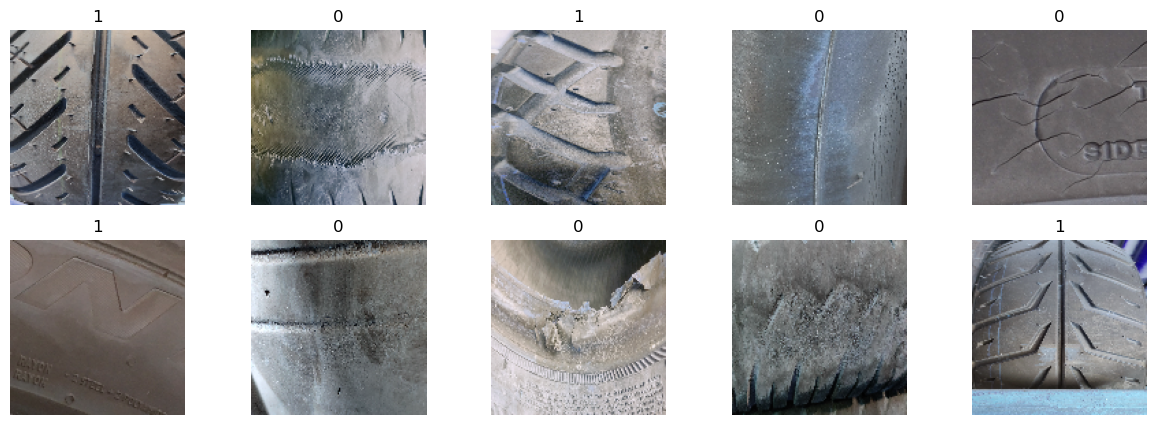

In [150]:
from matplotlib import pyplot as plt
def visualize(num_images):
    plt.figure(figsize=(15,5))
    col = int(num_images/2)
    for i in range (num_images):
        plt.subplot(2, col, i + 1)
        plt.imshow(all_images[i])
        plt.title(all_labels[i])
        plt.axis('off')
    plt.show()

visualize(10)

Now we have a whole set of images that are a random combonation of good and defective tires, where the good tires are labeled with a '1' and the defective tires are labeled with a '0'. Next I will split them up into a training and testing set. 

<h2>Divide and Conquer!</h2>
When dividing the data into training and testing, I'm using Stratified K-Fold Cross-Validation. It ensures that each fold maintains the same proportion of 'good' and 'bad' tires as the overall dataset. This method helps in mitigating biases and provides a more robust evaluation of the models' performance, especially considering the potential class imbalance in the dataset. It also mirrors real-world scenarios better by ensuring that the algorithm trains on a diverse representation of both 'good' and 'bad' quality wines in various folds, enhancing the generalization capability of the models.

In [234]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

histories = [[] for _ in range(len(models))]
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Create a stratified 10-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over the models
for i, model in enumerate(models):
    print(f"Model {i + 1}")

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])
    modelsT[i].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])
    # Iterate over folds
    for fold, (train_index, test_index) in enumerate(stratified_kfold.split(all_images, all_labels)):
        X_train, X_test = all_images[train_index], all_images[test_index]
        y_train, y_test = all_labels[train_index], all_labels[test_index]

        # Create ImageDataGenerator for training data with augmentation
        train_datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )

        # Create ImageDataGenerator for validation data
        val_datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )

        # Create training and validation generators
        train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
        val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

        #history = model.fit(train_generator, epochs=1, validation_data=val_generator, callbacks=early_stopping)
        #histories[i].append(history)          


Model 1
Model 2
Model 3
Model 4


<h2>Let's Run the Models!</h2>

In [152]:
histories = []
for i, model in enumerate(models):
    print(f'Model {i+1}')
    histories.append(model.fit(train_generator, epochs=10, validation_data=val_generator))

Model 1
Epoch 1/10
53/53 [==============================] - 27s 469ms/step - loss: 120.7125 - accuracy: 0.5703 - precision: 0.5204 - recall: 0.4786 - auc: 0.5685 - val_loss: 2.8342 - val_accuracy: 0.5892 - val_precision: 0.5268 - val_recall: 0.7195 - val_auc: 0.6310
Epoch 2/10
53/53 [==============================] - 24s 448ms/step - loss: 2.8582 - accuracy: 0.5464 - precision: 0.4923 - recall: 0.5174 - auc: 0.5611 - val_loss: 2.8570 - val_accuracy: 0.5351 - val_precision: 0.4831 - val_recall: 0.6951 - val_auc: 0.6099
Epoch 3/10
53/53 [==============================] - 24s 443ms/step - loss: 2.3003 - accuracy: 0.5434 - precision: 0.4892 - recall: 0.5161 - auc: 0.5777 - val_loss: 1.8280 - val_accuracy: 0.5676 - val_precision: 0.5094 - val_recall: 0.6585 - val_auc: 0.6278
Epoch 4/10
53/53 [==============================] - 25s 472ms/step - loss: 1.7832 - accuracy: 0.5302 - precision: 0.4760 - recall: 0.5188 - auc: 0.5653 - val_loss: 1.5692 - val_accuracy: 0.5676 - val_precision: 0.5119 -

In [153]:
from sklearn import metrics as mt
for i, model in enumerate(models):
    print(f"Model {i+1}")
    yhat = np.round(model.predict(X_test))
    print(mt.classification_report(y_test,yhat))

Model 1
6/6 [==============================] - 1s 82ms/step
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       103
           1       0.57      0.56      0.56        82

    accuracy                           0.62       185
   macro avg       0.61      0.61      0.61       185
weighted avg       0.62      0.62      0.62       185

Model 2
6/6 [==============================] - 1s 130ms/step
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       103
           1       0.63      0.48      0.54        82

    accuracy                           0.64       185
   macro avg       0.64      0.63      0.62       185
weighted avg       0.64      0.64      0.63       185

Model 3
6/6 [==============================] - 2s 342ms/step
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       103
           1       0.79      0.41      0.54        82



<h2>Let's Look at the Models Separately</h2>

To evaluate the performance of a binary classification setting, the choice of metrics should go beyond accuracy due to potential imbalances in the class distribution. In this context, precision, recall, and AUC score become significant. Precision calculates the ratio of correctly predicted positive observations to the total predicted positive observations, recall computes the ratio of correctly predicted positive observations to the all observations in actual class, while AUC score shows the true positive to false positive ratio. So we'll be looking at all of these metrics to evaluate the model.

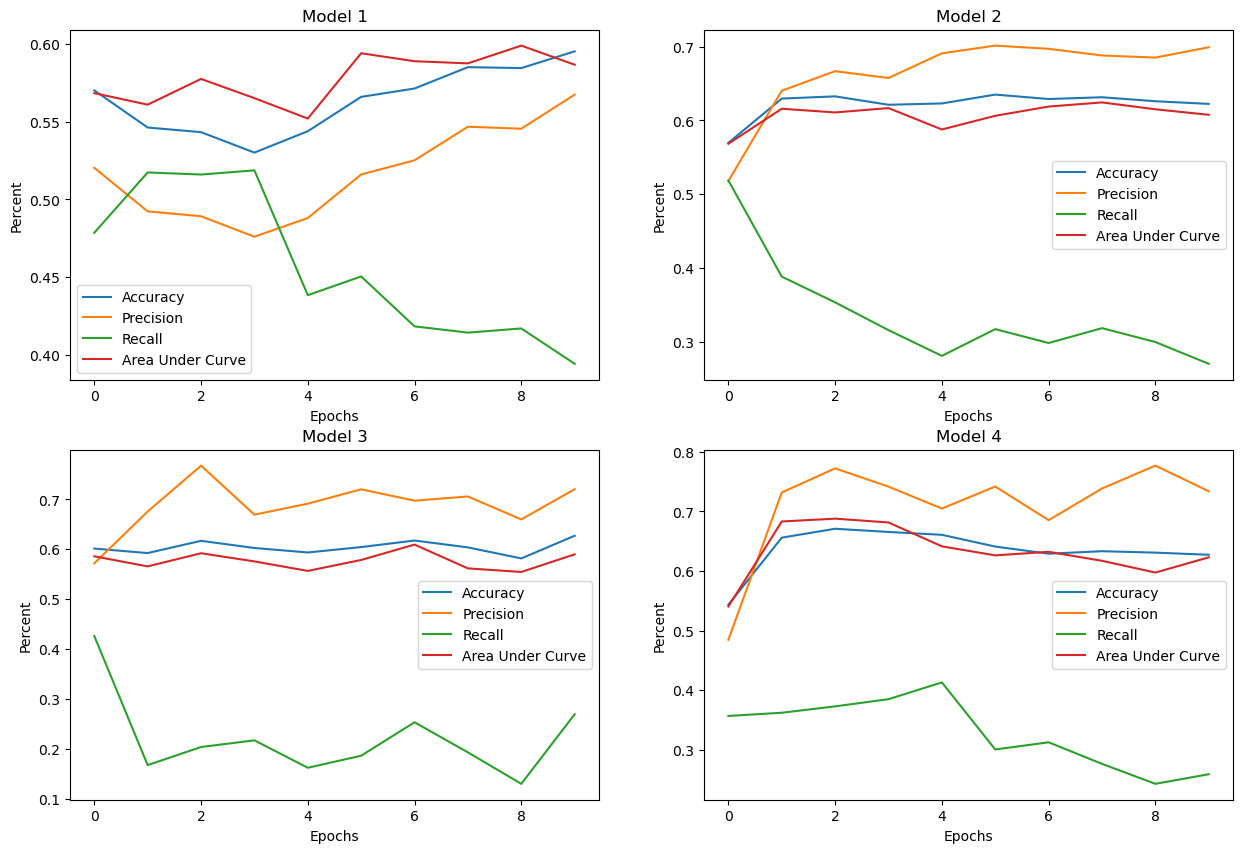

In [154]:
values = [[] for _ in range(4)]
for i in range(4):
    values[i] = histories[i].history['accuracy'], histories[i].history['precision'], histories[i].history['recall'], histories[i].history['auc'], histories[i].history['loss']

plt.figure(figsize=(15, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(values[i][0], label='Accuracy')
    plt.plot(values[i][1], label='Precision')
    plt.plot(values[i][2], label='Recall')
    plt.plot(values[i][3], label='Area Under Curve')
    plt.title(f'Model {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Percent')
    plt.legend()

Recall seems to be our lowest metric across the board, meaning that the models are struggling to correctly identify good tires, making false negatives. This makes sense as there's 1028 defective images and 828 good tires. Further work could involve having an even split of good and bad tires and seeing what that does for performance. 

<h2>Loss Convergence</h2>

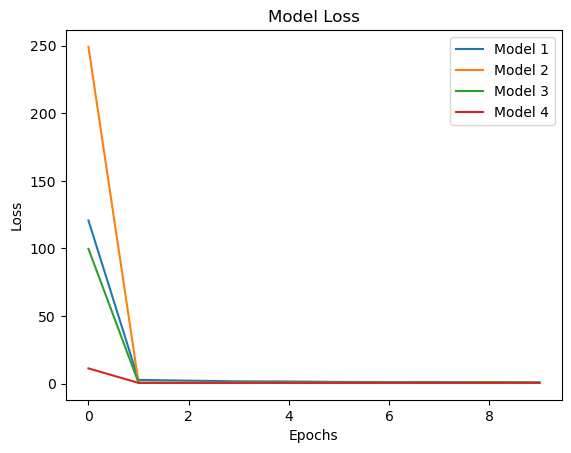

In [155]:
for i in range(4):
    plt.plot(values[i][4], label=f'Model {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

<h3>Individual Model Loss</h3>

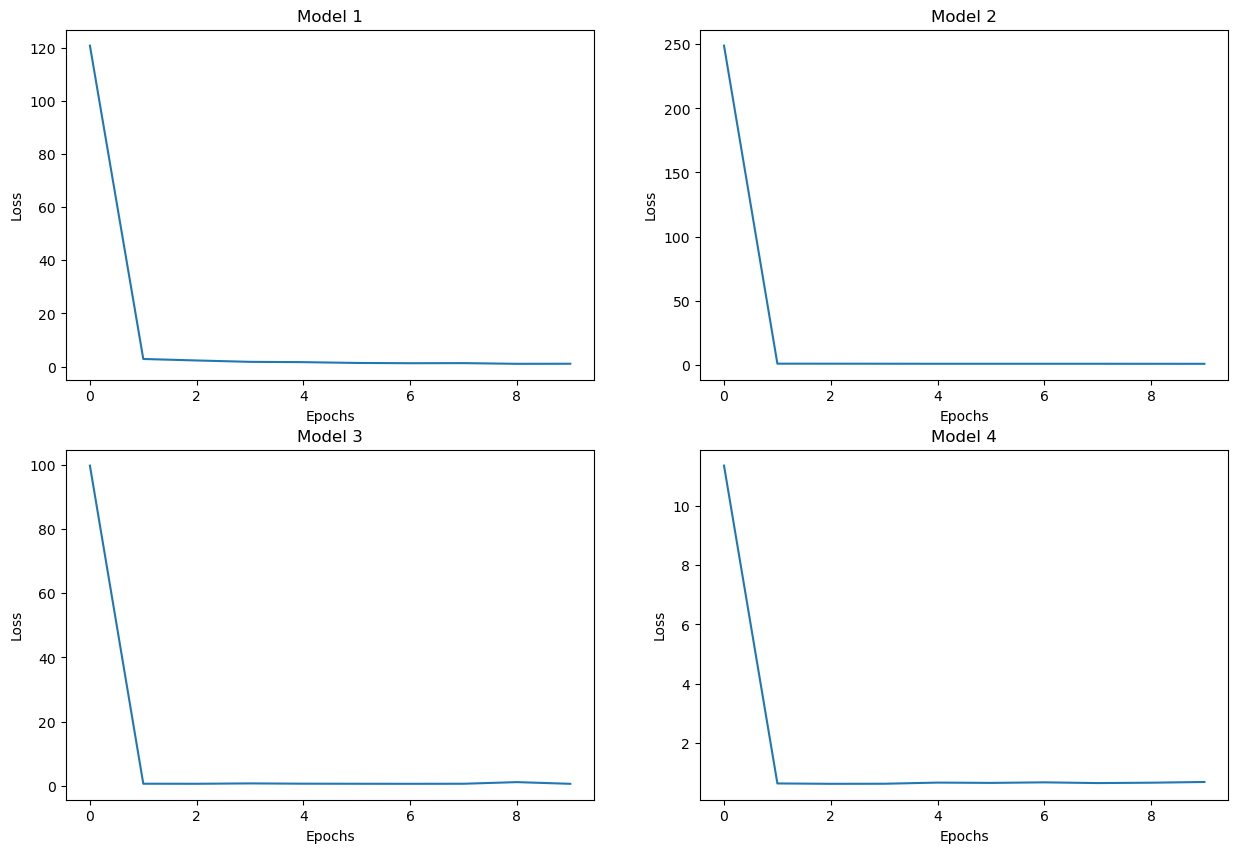

In [157]:
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(values[i][4])
    plt.title(f'Model {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

All models seem to successfully converge.

<h2>Model Comparison</h2>

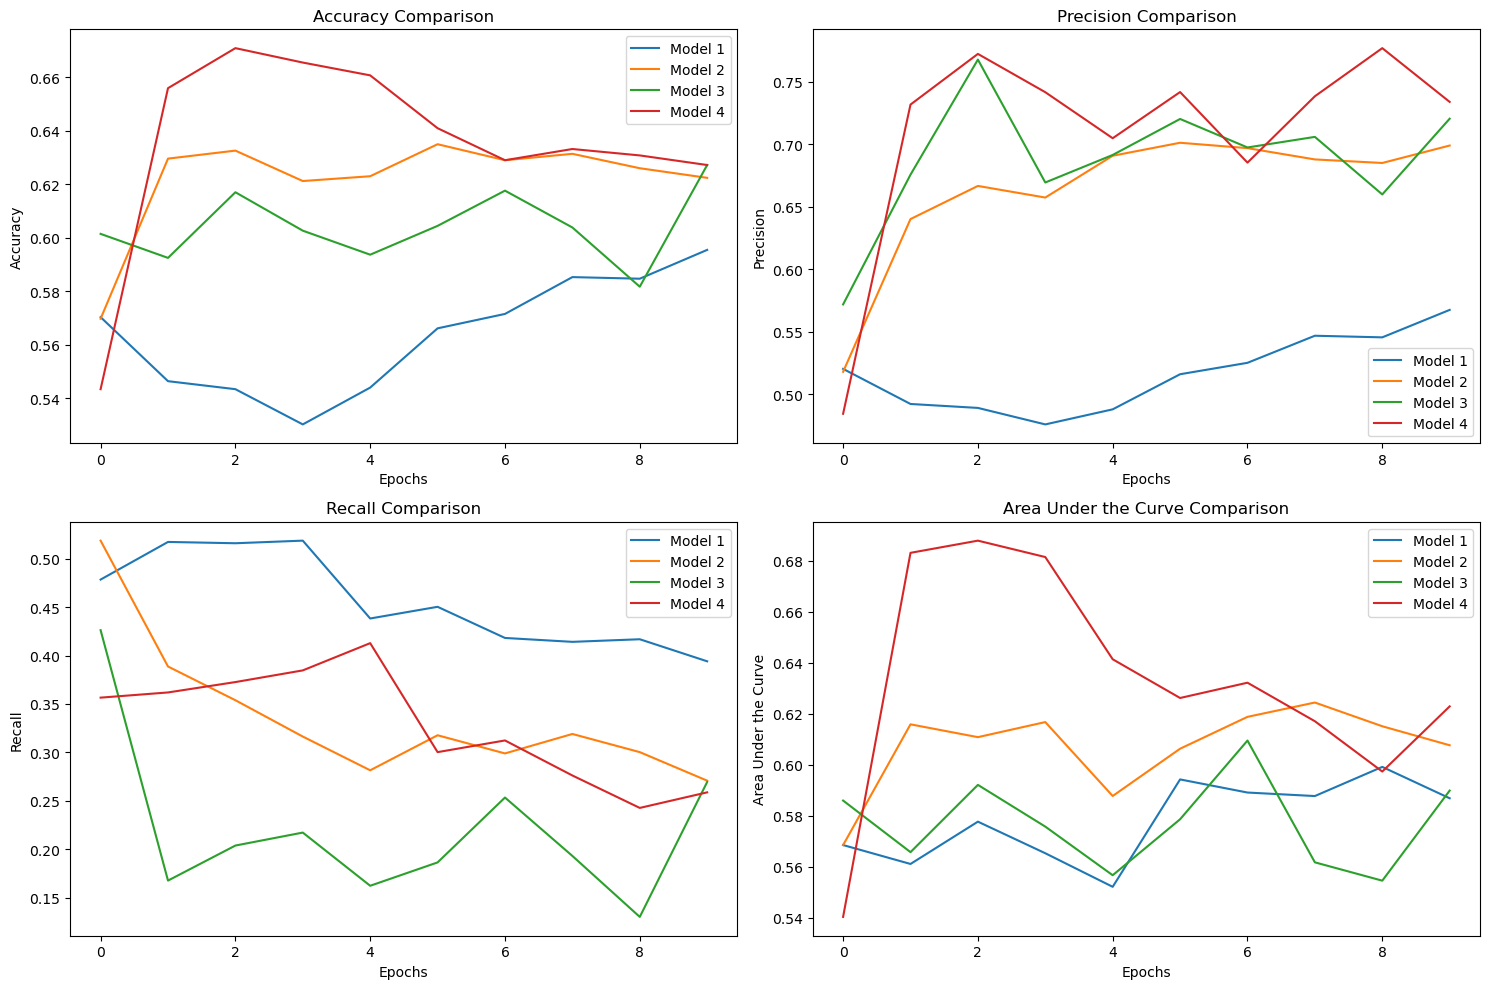

In [158]:
metrics = ['Accuracy', 'Precision', 'Recall', 'Area Under the Curve']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.plot(values[0][i], label='Model 1')
    plt.plot(values[1][i], label='Model 2')
    plt.plot(values[2][i], label='Model 3')
    plt.plot(values[3][i], label='Model 4')
    plt.title(f'{metric} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()

Model 4 seems to perform better on every metric but recall

<h2>CNN vs MLP</h2>
<h3>Create the MLP</h3>

In [208]:
from sklearn.metrics import roc_curve, auc
mlp_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the input
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
histories[4]= mlp_history
values[4]= ([mlp_history.history['accuracy'], mlp_history.history['precision'], mlp_history.history['recall'], mlp_history.history['auc'], mlp_history.history['loss']])

mlp_preds = mlp_model.predict(X_test)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_preds)
mlp_auc = auc(mlp_fpr, mlp_tpr)


Epoch 1/10
53/53 [==============================] - 8s 95ms/step - loss: 962.1786 - accuracy: 0.5111 - precision: 0.4502 - recall: 0.4303 - auc: 0.5029 - val_loss: 227.4273 - val_accuracy: 0.4649 - val_precision: 0.4514 - val_recall: 0.9634 - val_auc: 0.5157
Epoch 2/10
53/53 [==============================] - 5s 85ms/step - loss: 370.4365 - accuracy: 0.5194 - precision: 0.4596 - recall: 0.4343 - auc: 0.5109 - val_loss: 287.7528 - val_accuracy: 0.4378 - val_precision: 0.4396 - val_recall: 0.9756 - val_auc: 0.4927
Epoch 3/10
53/53 [==============================] - 4s 84ms/step - loss: 577.6349 - accuracy: 0.5386 - precision: 0.4824 - recall: 0.4584 - auc: 0.5307 - val_loss: 87.7158 - val_accuracy: 0.5892 - val_precision: 0.5319 - val_recall: 0.6098 - val_auc: 0.5878
Epoch 4/10
53/53 [==============================] - 5s 87ms/step - loss: 402.7210 - accuracy: 0.5512 - precision: 0.4973 - recall: 0.5027 - auc: 0.5447 - val_loss: 1022.8970 - val_accuracy: 0.5568 - val_precision: 0.0000e+00

<h3>MLP Summery</h3>

In [241]:
print(mt.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       103
           1       0.95      0.89      0.92        82

    accuracy                           0.93       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.93      0.93      0.93       185



<h2>MLP vs CNN: ROC & AUC</h2>
Since model 4 performed the best by the most metrics, I'll be comparing it to the MLP model.

6/6 [==============================] - 2s 245ms/step


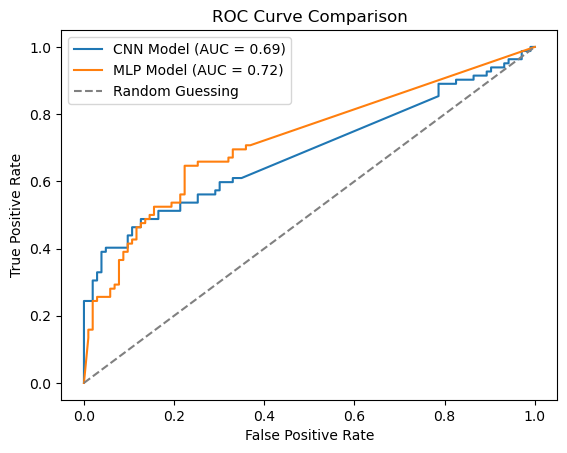

In [227]:
cnn_preds = models[3].predict(X_test)
cnn_fpr, cnn_tpr, _ = roc_curve(y_test, cnn_preds)
cnn_auc = auc(cnn_fpr, cnn_tpr)

plt.plot(cnn_fpr, cnn_tpr, label=f'CNN Model (AUC = {cnn_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP Model (AUC = {mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

<h2>Statistical Comparison</h2>

In [211]:
from sklearn.metrics import roc_auc_score
from scipy.stats import mannwhitneyu

# Assuming cnn_preds and mlp_preds are the predicted probabilities
y_true = np.array(y_test)
auc_cnn = roc_auc_score(y_true, cnn_preds)
auc_mlp = roc_auc_score(y_true, mlp_preds)

print(f"AUC CNN: {auc_cnn:.4f}")
print(f"AUC MLP: {auc_mlp:.4f}\n")
print(f"Predictions CNN: {len(np.unique(cnn_preds))}")
print(f"Predictions MLP: {len(np.unique(mlp_preds))}")

# Perform DeLong test
roc_cnn = roc_auc_score(y_true, cnn_preds)
roc_mlp = roc_auc_score(y_true, mlp_preds)

roc_cnn = np.array([roc_cnn])
roc_mlp = np.array([roc_mlp])

stat, p_value_mannwhitneyu = mannwhitneyu(cnn_preds, mlp_preds, alternative='two-sided')

print(f"\nP-Value (Mann-Whitney U Test): {p_value_mannwhitneyu}")

AUC CNN: 0.6872
AUC MLP: 0.7240

Predictions CNN: 121
Predictions MLP: 86

P-Value (Mann-Whitney U Test): [6.10864789e-42]


With such a low p-value, it suggests a statistically significant difference in their performance, with the MLP model outperforming the CNN model.

<h3>MLP Metrics</h3>

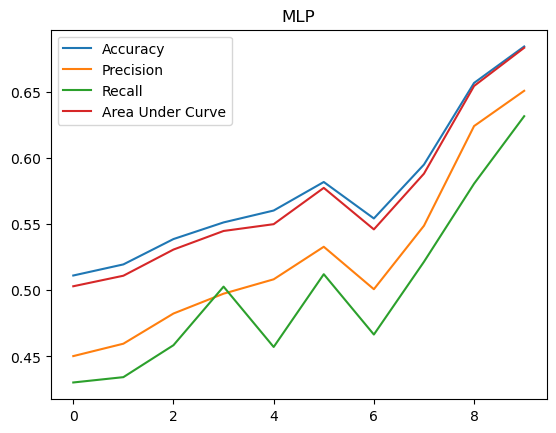

In [212]:
plt.plot(values[4][0], label='Accuracy')
plt.plot(values[4][1], label='Precision')
plt.plot(values[4][2], label='Recall')
plt.plot(values[4][3], label='Area Under Curve')    
plt.title('MLP')
plt.legend()

<h3>MLP Loss</h3>

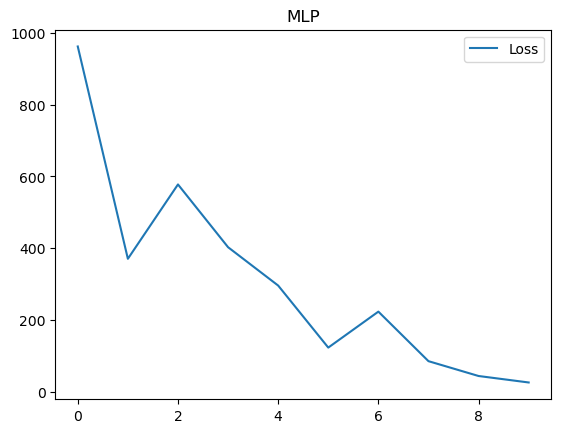

In [213]:
plt.plot(values[4][4], label='Loss')
plt.title('MLP')
plt.legend()

It looks like the MLP also successfully converges.

<h2>MLP vs CNN Metric Comparison</h2>

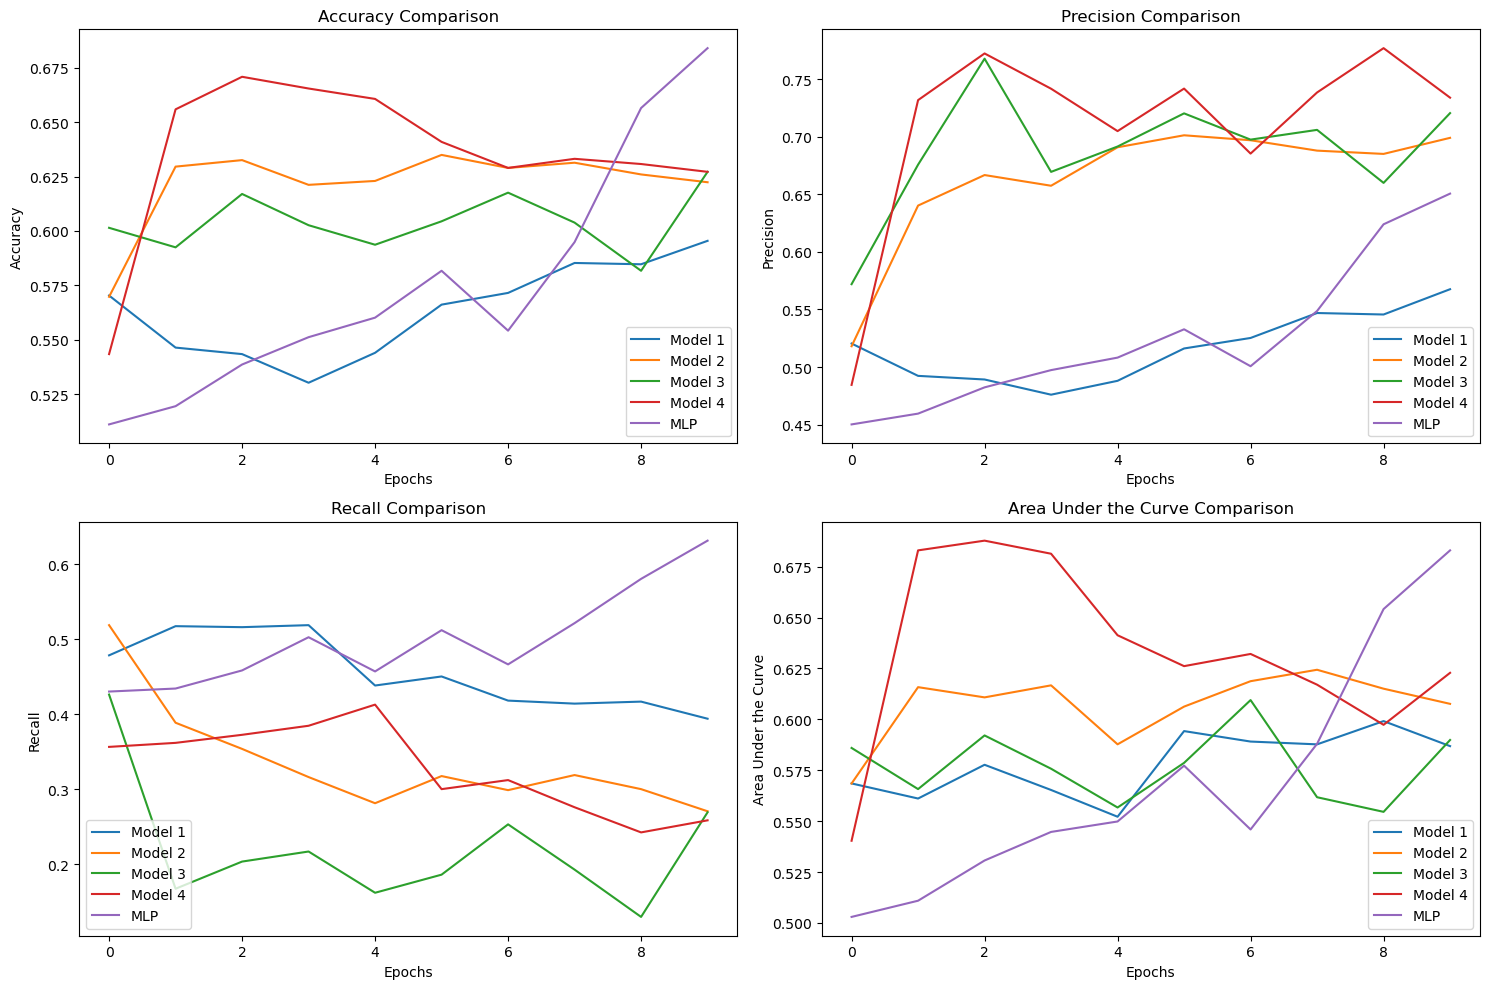

In [214]:
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.plot(values[0][i], label='Model 1')
    plt.plot(values[1][i], label='Model 2')
    plt.plot(values[2][i], label='Model 3')
    plt.plot(values[3][i], label='Model 4')
    plt.plot(values[4][i], label='MLP')
    plt.title(f'{metric} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()

We can see that the MLP performed worse on most metrics until the end, where it was better in every metric but precision, I could guess that with even more epochs, that the MLP would continue to improve.

<h2>Running the Transfered Learning Models</h2>

In [237]:
# I was hoping to be able to compare all of them to their other model counterparts, but it just takes too long to run
historiesT = []
for i in range(1):
    print(f'Model {i+1}')
    historiesT.append(modelsT[i].fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)))

Model 1
Epoch 1/10
53/53 [==============================] - 138s 3s/step - loss: 0.0747 - accuracy: 0.9743 - precision: 0.9718 - recall: 0.9705 - auc: 0.9964 - val_loss: 0.2424 - val_accuracy: 0.9351 - val_precision: 0.9375 - val_recall: 0.9146 - val_auc: 0.9611
Epoch 2/10
53/53 [==============================] - 135s 3s/step - loss: 0.0195 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9946 - auc: 0.9999 - val_loss: 0.2436 - val_accuracy: 0.9297 - val_precision: 0.9481 - val_recall: 0.8902 - val_auc: 0.9651
Epoch 3/10
53/53 [==============================] - 136s 3s/step - loss: 0.0064 - accuracy: 0.9994 - precision: 1.0000 - recall: 0.9987 - auc: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9405 - val_precision: 0.9494 - val_recall: 0.9146 - val_auc: 0.9667
Epoch 4/10
53/53 [==============================] - 140s 3s/step - loss: 0.0031 - accuracy: 0.9994 - precision: 0.9987 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.9243 - val_precision: 0.9359 - val_recal

<h3>Transfered Learning Model Summery</h3>

In [239]:
yhat = np.round(modelsT[0].predict(X_test))
print(mt.classification_report(y_test,yhat))

6/6 [==============================] - 13s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       103
           1       0.95      0.89      0.92        82

    accuracy                           0.93       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.93      0.93      0.93       185



<h3>Transfered Learning Model Loss Convergence</h3>

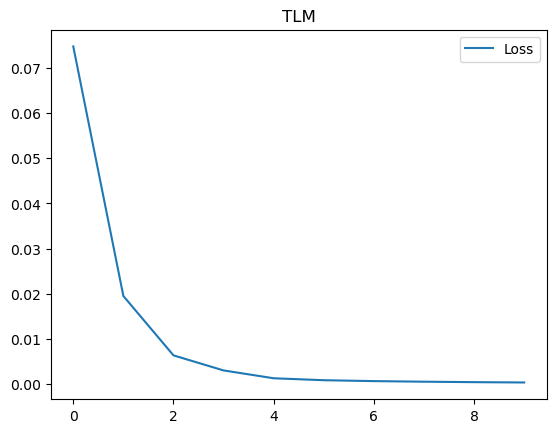

In [242]:
valuesT = [[] for _ in range(4)]
valuesT[0] = historiesT[0].history['accuracy'], historiesT[0].history['precision'], historiesT[0].history['recall'], historiesT[0].history['auc'], historiesT[0].history['loss']

plt.plot(valuesT[0][4], label='Loss')
plt.title('TLM')
plt.legend()

It looks like the transfered learning model converges very well.

<h3>Transfered Learning vs Normal CNN</h3>
Let's look at each model and how using the pre-trained weights effected the performance on each of our choosen metrics.

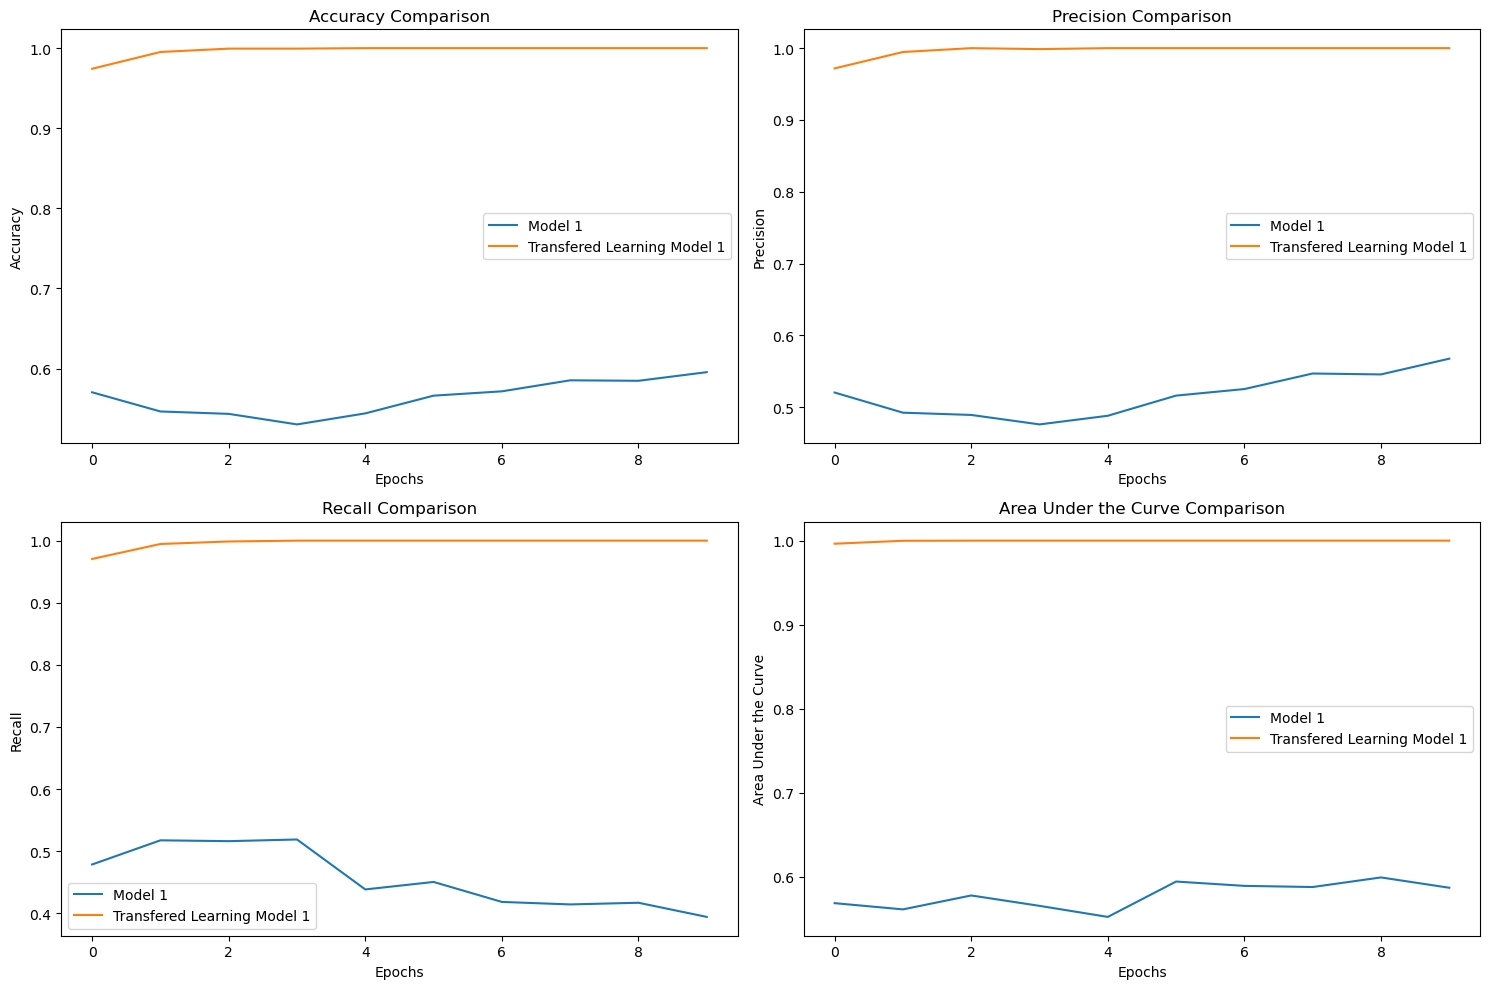

In [243]:
#valuesT = [[] for _ in range(4)]
#for i in range(4):
#    valuesT[i] = historiesT[i].history['accuracy'], historiesT[i].history['precision'], historiesT[i].history['recall'], historiesT[i].history['auc'], historiesT[i].history['loss']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.plot(values[0][i], label='Model 1')
    plt.plot(valuesT[0][i], label='Transfered Learning Model 1')
    plt.title(f'{metric} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
plt.tight_layout()
plt.show()

It's very clear that the transfered learning model performs statistically better than the normal CNN model without the pre-tained weights. 